# Training neural network to predict ball position in a 3d space
## 1. Importing Libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from utils.evaluate import evaluate_model
from utils.plot_maker_gaussian_process import plot_maker_3d

## 2. Importing Data

In [3]:
# get all train data
X_train_sin = pd.read_csv('../data/data-train-sin-nick/red_ball_coordinates_128px_2024-03-05_full.csv', decimal='.', delimiter=',')
X_train_sin.shape

(10543, 14)

In [4]:
# get all the position data
y_train_sin = pd.read_csv('../data/data-train-sin-nick/positions_xyz_128px_2024-03-05_full.csv', decimal='.', delimiter=',')
y_train_sin.shape

(10543, 3)

In [5]:
# concatenate all the data
X_train = pd.concat([X_train_sin])
y_train = pd.concat([y_train_sin])
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_train.shape, y_train.shape

((10543, 14), (10543, 3))

## 3. Data Preprocessing

In [6]:
combined = pd.concat([X_train, y_train], axis=1)
combined

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6,x,y,z
0,47.375000,75.250000,73.500000,53.666667,30.000000,99.714286,29.500000,76.000000,31.500000,54.000000,73.833333,99.166667,75.333333,75.777778,10.13833,3.409981,22.39198
1,47.625000,75.500000,73.500000,54.500000,30.125000,100.125000,29.714286,77.000000,31.400000,54.800000,73.800000,99.600000,75.833333,76.000000,10.13334,3.509852,22.49185
2,47.375000,76.125000,73.400000,54.800000,30.125000,100.875000,30.000000,77.500000,31.500000,55.000000,74.166667,100.166667,75.714286,76.714286,10.12501,3.609500,22.59150
3,46.857143,76.428571,73.500000,55.500000,30.200000,101.400000,29.833333,78.166667,31.666667,55.666667,74.200000,100.600000,75.500000,77.500000,10.11337,3.708816,22.69081
4,47.625000,77.250000,73.500000,55.500000,30.500000,102.000000,30.200000,78.600000,31.333333,56.333333,74.166667,101.166667,75.600000,78.200000,10.09843,3.807688,22.78969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10538,22.000000,105.500000,66.833333,58.666667,38.222222,78.444444,65.000000,79.375000,54.625000,100.875000,25.285714,59.571429,22.500000,81.875000,11.24899,4.288839,22.94084
10539,22.400000,105.800000,67.285714,59.428571,34.333333,77.500000,64.571429,79.285714,57.300000,101.600000,25.363636,59.909091,22.714286,82.000000,11.22574,4.386093,23.03809
10540,22.400000,106.800000,67.500000,59.500000,37.375000,78.875000,65.250000,80.000000,56.555556,101.666667,25.500000,60.000000,23.000000,82.666667,11.19926,4.482517,23.13452
10541,22.833333,107.166667,67.500000,59.875000,37.500000,78.750000,65.500000,80.250000,53.285714,101.142857,25.700000,60.900000,23.000000,83.500000,11.16959,4.578005,23.23001


In [7]:
# check for missing values
print(f'The data has missing values: {combined.isnull().sum().sum()}')
combined.dropna(inplace=True)
combined.shape

The data has missing values: 356


(10365, 17)

In [8]:
X = combined.iloc[:, :14]
y = combined.iloc[:, 14:]

In [9]:
# scale the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## 4. Hyperparameter Tuning

In [10]:
# create a pipeline
pipeline = Pipeline([
    ('mlp', MLPRegressor(random_state=42))
])

In [11]:
param_grid = {
    'mlp__hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'mlp__activation': ['identity', 'tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.001, 0.01, 0.1],
    'mlp__max_iter': [10000, 20000, 28000],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
    'mlp__early_stopping': [True],
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, n_iter=100, n_jobs=-1, verbose=3, random_state=42)

random_search.fit(X_scaled, y_scaled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\xande\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\xande\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\xande\venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\xande\venv\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\xande\venv\lib\site-

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('mlp',
                                              MLPRegressor(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'mlp__activation': ['identity', 'tanh',
                                                            'relu'],
                                        'mlp__alpha': [0.001, 0.01, 0.1],
                                        'mlp__early_stopping': [True],
                                        'mlp__hidden_layer_sizes': [(50, 50,
                                                                     50),
                                                                    (50, 100,
                                                                     50),
                                                                    (100,)],
                                        'mlp__learning_rate': ['constant',
                                                               'adaptive'],
                                        'mlp__learning_rate_init': [0.001, 0.01,
                                                                    0.1],
                                        'mlp__max_iter': [10000, 20000, 28000],
                                        'mlp__solver': ['sgd', 'adam']},
                   random_state=42, verbose=3)

In [12]:
print(f'Best parameters: {random_search.best_params_}')
print(f'Best score: {random_search.best_score_}')

Best parameters: {'mlp__solver': 'adam', 'mlp__max_iter': 20000, 'mlp__learning_rate_init': 0.01, 'mlp__learning_rate': 'constant', 'mlp__hidden_layer_sizes': (50, 100, 50), 'mlp__early_stopping': True, 'mlp__alpha': 0.01, 'mlp__activation': 'relu'}
Best score: 0.7896879582911903


In [13]:
model = random_search.best_estimator_

## 5. Training the Model

In [14]:
model.fit(X_scaled, y_scaled)

Pipeline(steps=[('mlp',
                 MLPRegressor(alpha=0.01, early_stopping=True,
                              hidden_layer_sizes=(50, 100, 50),
                              learning_rate_init=0.01, max_iter=20000,
                              random_state=42))])

## 6. Make Predictions On Test Data

In [15]:
# get all test data
X_test_sin = pd.read_csv('../data/data-test-sin-nick/red_ball_coordinates_2024-03-05_12h01m.csv', decimal='.', delimiter=',')
X_test_sin.shape

(1408, 14)

In [16]:
# get all the position data
y_test_sin = pd.read_csv('../data/data-test-sin-nick/positions_xyz_2024-03-05_12h01m.csv', decimal='.', delimiter=',')
y_test_sin.shape

(1412, 3)

In [17]:
def prepare_and_scale_test_data(X_test_val, y_test_val, scaler_x_test):
    y_test_val = y_test_val.iloc[4:]
    combined_test = pd.concat([X_test_val, y_test_val], axis=1)
    combined_test.dropna(inplace=True)
    X_val = combined_test.iloc[:, :14]
    y_val = combined_test.iloc[:, 14:]
    X_scaled_test = scaler_x_test.transform(X_val)
    return X_scaled_test, y_val

In [18]:
def predict_evaluate_plot(X_test_val_scaled, y_test_val, nn_model, scaler_y_test, title='Trajectory of Ball in 3D Space'):
    y_test_predicted_scaled = nn_model.predict(X_test_val_scaled)
    y_test_pred = scaler_y_test.inverse_transform(y_test_predicted_scaled)
    mse, mae, r2 = evaluate_model(y_test_val, y_test_pred, 'Test Data')
    # change col 1 and 2 from place, so it corresponds to the unity 3d space
    y_test_pred = y_test_pred[:, [0, 2, 1]]
    y_test_val = y_test_val.to_numpy()[:, [0, 2, 1]]
    plot_maker_3d(y_test_val, y_test_pred, title)
    return y_test_pred, mse, mae, r2

Mean Squared Error on Test Data Set: 2.8653601809987013
Mean Absolute Error on Test Data Set: 1.1097238222365717
R2 Score on Test Data set: 0.3373306821267252


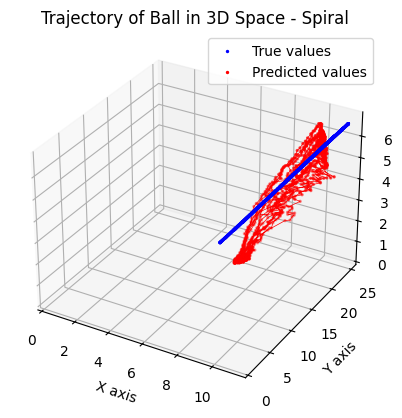

In [19]:
X_test_scaled_spiral, y_test_spiral = prepare_and_scale_test_data(X_test_sin, y_test_sin, scaler_x)
y_test_pred_spiral, mse_spiral, mae_spiral, r2_spiral =predict_evaluate_plot(X_test_scaled_spiral, y_test_spiral, model, scaler_y, 'Trajectory of Ball in 3D Space - Spiral')